In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


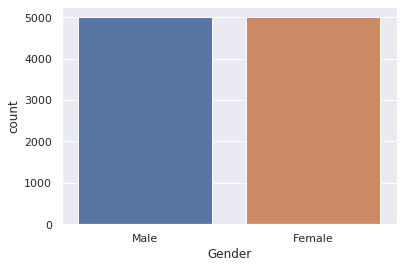

In [8]:
plot = sns.countplot(df["Gender"])

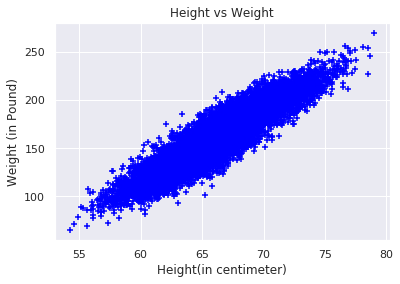

In [11]:
plt.title("Height vs Weight")
plt.xlabel('Height(in centimeter)')
plt.ylabel('Weight (in Pound)')
plt.scatter(df.Height,df.Weight,color='blue',marker='+')

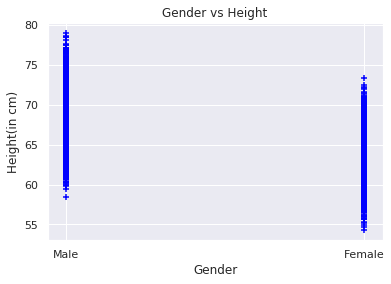

In [13]:
plt.title("Gender vs Height")
plt.xlabel('Gender')
plt.ylabel('Height(in cm)')
plt.scatter(df.Gender,df.Height,color='blue',marker='+')

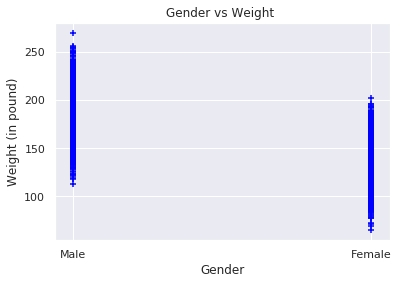

In [14]:
plt.title("Gender vs Weight ")
plt.xlabel('Gender')
plt.ylabel('Weight (in pound)')
plt.scatter(df.Gender,df.Weight,color='blue',marker='+')

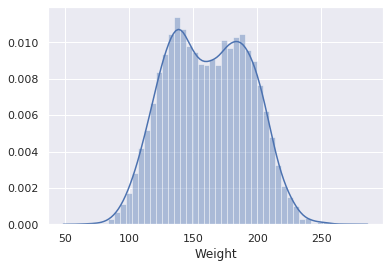

In [16]:
plot = sns.distplot(df["Weight"],
                    hist=True)

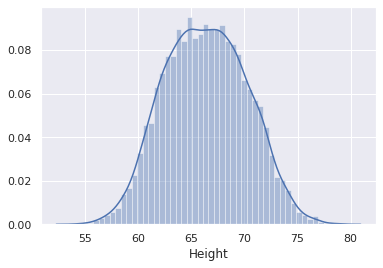

In [17]:
plot = sns.distplot(df["Height"],
                    hist=True)

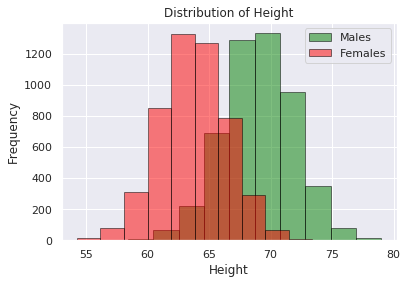

In [22]:
df[df['Gender']=='Male'].Height.plot(kind='hist',color='green',edgecolor='black', alpha=0.5)
df[df['Gender']=='Female'].Height.plot(kind='hist',color='red',edgecolor='black', alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency');

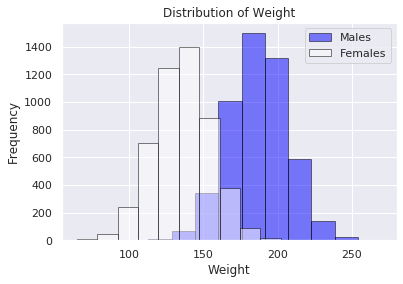

In [23]:
df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5 )
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='white',edgecolor='black', alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency');

In [26]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Gender']= le.fit_transform(df['Gender']) 

In [27]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [31]:
weight = df['Weight']

In [32]:
weight

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [33]:
train_df = df.drop(['Weight'],axis=1)

In [34]:
train_df

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
9995,0,66.172652
9996,0,67.067155
9997,0,63.867992
9998,0,69.034243


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train , x_test , y_train , y_test = train_test_split(train_df , weight , test_size = 0.10,random_state =2)

In [39]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.score(x_test,y_test)

0.9041344665669725

In [42]:
reg.predict([[1,73.847017]])

array([215.79936305])

In [44]:
reg.predict([[0,61.9442458795172]])

array([125.28077092])

# In manual predict function, we use 1st and last row data which is almost same our actual dataset. Lets see......

In [45]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
